# Bibliotecas

In [1]:
import torch
import torchvision
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
import numpy as np

import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim

import pandas as pd
import seaborn as sns

# Dataloader

In [2]:
BatchSize = 200

In [3]:
treino = datasets.MNIST("", train= True, download= True, transform= transforms.Compose([transforms.ToTensor()]))
teste = datasets.MNIST("", train= False, download= True, transform= transforms.Compose([transforms.ToTensor()]))

treinoBatch = torch.utils.data.DataLoader(treino, batch_size= BatchSize, shuffle= True)
testeBatch = torch.utils.data.DataLoader(teste, batch_size= BatchSize, shuffle= True)

# Verificando Distribuição

In [4]:
total = 0
dicionario = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in treinoBatch:
    Xs, ys = data
    for y in ys:
        dicionario[int(y)] += 1
        total += 1

for digito in dicionario:
    print(f"{digito}: {dicionario[digito] / total * 100}%")

0: 9.871666666666666%
1: 11.236666666666666%
2: 9.93%
3: 10.218333333333334%
4: 9.736666666666666%
5: 9.035%
6: 9.863333333333333%
7: 10.441666666666666%
8: 9.751666666666667%
9: 9.915000000000001%


# Rede Neural

In [5]:
class Rede(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28 * 28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)

        return F.log_softmax(x, dim= 1)

rede = Rede()

## Treinando Rede

In [6]:
## Número de vezes que passamos pela base inteira de treino
EPOCHS = 5

In [7]:
otimizador = optim.Adam(rede.parameters(), lr = 0.001)

erroList = []
erroTestList = []
batch = []

for epoch in range(EPOCHS):

    ## Erro teste
    '''
    for dataTest in testeBatch:
        X_Teste, y_Teste = dataTest
        outputTeste = rede(X_Teste.view(-1, 28*28))
        erroTeste = F.nll_loss(outputTeste, y_Teste)
        erroTestList.append(np.float64(erroTeste.detach().numpy()))
    '''

    ## Treinando com base de treino
    for data, i in zip(treinoBatch, range(len(treinoBatch))):
        #Calculando erro de teste
        for dataTest in testeBatch:
            break
        X_Teste, y_teste = dataTest
        outputTeste = rede(X_Teste.view(-1, 28*28))
        erroTeste = F.nll_loss(outputTeste, y_teste)
        erroTestList.append(np.float64(erroTeste.detach().numpy()))

        ## Instância dentro do lote de treino
        X, y = data

        output = rede(X.view(-1, 28*28))

        #Calculando erro
        erro = F.nll_loss(output, y)
        erroList.append(np.float64(erro.detach().numpy()))
        batch.append(i + (epoch * len(treinoBatch))) 
        
        rede.zero_grad()
        erro.backward()
        otimizador.step()



## Calculando acurácia

In [8]:
corretos = 0
total = 0

with torch.no_grad():
    for data in testeBatch:
        X, y = data
        output = rede(X.view(-1, 28 * 28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                corretos += 1
            total += 1

print("Acurácia: ", round(corretos/ total, 3))

Acurácia:  0.962


### Visualizando os 5 primeiros exemplos

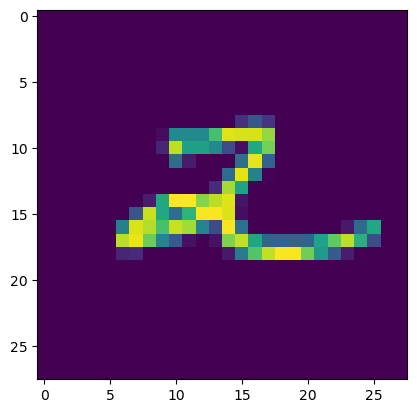

tensor(2)


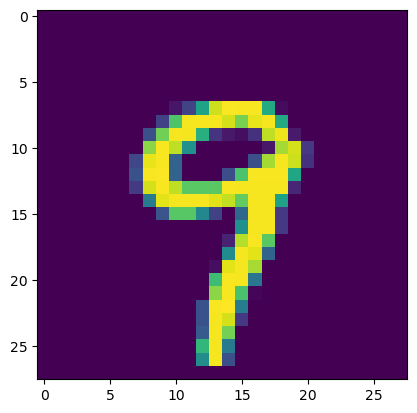

tensor(9)


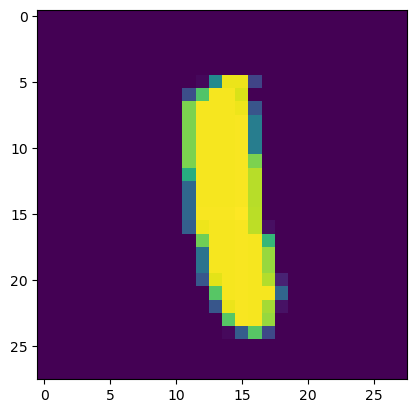

tensor(1)


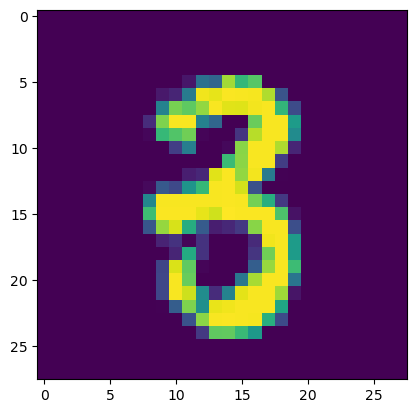

tensor(3)


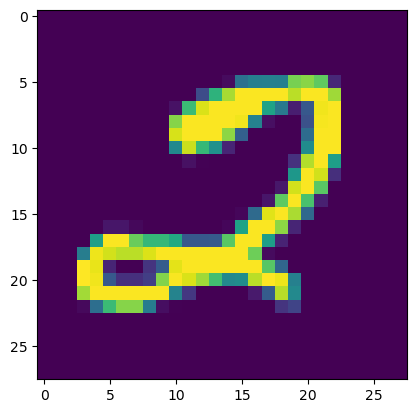

tensor(2)


In [9]:
for i in range(5):
    plt.imshow(X[i].view(28,28))
    plt.show()
    print(torch.argmax(rede(X[i].view(-1, 28*28))[0]))

# Gráfico do Erro de treino e Teste

<Axes: xlabel='Iteracao', ylabel='Erro'>

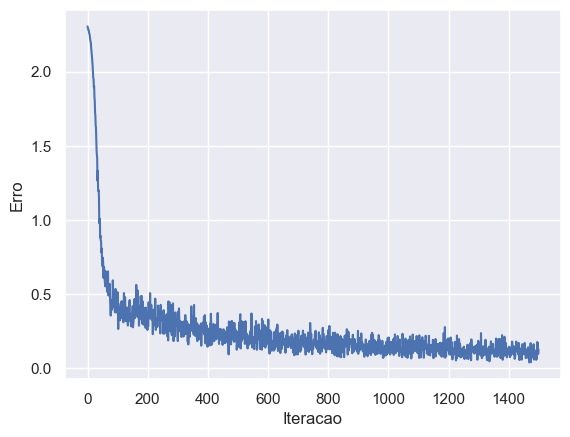

In [10]:
df = pd.DataFrame({"Iteracao" : batch, "Erro" : erroList})
sns.set()
sns.lineplot(data= df, x= 'Iteracao', y= 'Erro')

<Axes: xlabel='Iteracao', ylabel='Erro de Teste'>

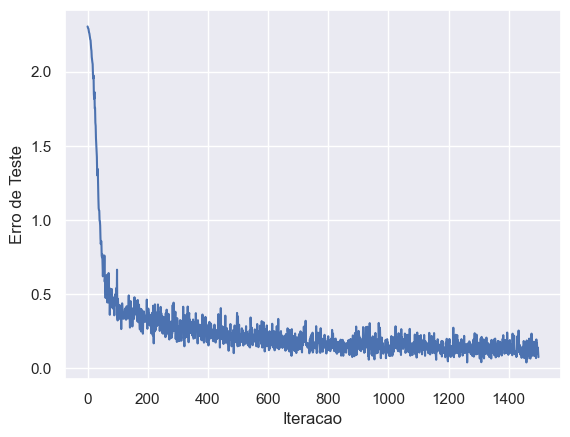

In [11]:
dfTeste = pd.DataFrame({'Iteracao' : range(len(erroTestList)), 'Erro de Teste' : erroTestList})
sns.set()
sns.lineplot(data= dfTeste, x= 'Iteracao', y= 'Erro de Teste')